In [10]:
# loading modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import colorcet as cc

In [11]:
# loading dhe data
Brain = pd.read_csv("(only mammals) including whole brain numbers 17 09 2024.csv")
# Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain.head(8)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,"5,080,000","47,984,000","58,580,000",11.5
2,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,"5,632,000","25,324,000","34,958,000",5.4
3,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,"6,039,000","59,651,000","69,763,000",13.7
4,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,"6,116,000","44,447,000","55,659,000",11.6
5,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,"6,150,000","15,740,000","26,880,000",35.3
6,Commerson's roundleaf bat,Chiroptera,Hipposideridae,0.2430,0.1070,0.588,"7,877,000","51,875,000","66,719,000",101.9
7,Smoky shrew,Eulipotyphla,Soricidae,0.0840,0.0200,0.176,"9,730,000","20,870,000","36,460,000",7.5


In [12]:
# Dropping NaN values
Brain = Brain.dropna().reset_index(drop=True)

In [13]:
# Converting into float and removing commas
if Brain['Forebrain n'].dtype != 'float64':
     Brain['Forebrain n'] = Brain['Forebrain n'].str.replace(',', '').astype(float)
if Brain['Cerebellum n'].dtype != 'float64':
     Brain['Cerebellum n'] = Brain['Cerebellum n'].str.replace(',', '').astype(float)
if Brain['Whole brain n'].dtype != 'float64':
     Brain['Whole brain n'] = Brain['Whole brain n'].str.replace(',', '').astype(float)

In [14]:
# Getting relative cortical and cerebellar masses and relative number of neurons in each structure
Brain['Forebrain m r %'] = Brain['Forebrain m']/Brain['Whole brain m']*100
Brain['Cerebellum m r %'] = Brain['Cerebellum m']/Brain['Whole brain m']*100
Brain['Forebrain n r %'] = Brain['Forebrain n']/Brain['Whole brain n']*100
Brain['Cerebellum n r %'] = Brain['Cerebellum n']/Brain['Whole brain n']*100

In [15]:
# Getting neuron densities in a miligram of structure
Brain['Forebrain n d'] = Brain['Forebrain n']/(Brain['Forebrain m']*1000)
Brain['Cerebellum n d'] = Brain['Cerebellum n']/(Brain['Cerebellum m']*1000)
Brain['Whole brain n d'] = Brain['Whole brain n']/(Brain['Whole brain m']*1000)

In [16]:
# Brain mass per body mass
Brain['Forebrain m per body m'] = Brain['Forebrain m']/Brain['Body m']*100
Brain['Cerebellum m per body m'] = Brain['Cerebellum m']/Brain['Body m']*100
Brain['Whole brain m per body m'] = Brain['Whole brain m']/Brain['Body m']*100

In [17]:
# Number of neurons per body mass
Brain['Forebrain n per body m'] = Brain['Forebrain n']/Brain['Body m']
Brain['Cerebellum n per body m'] = Brain['Cerebellum n']/Brain['Body m']
Brain['Whole brain n per body m'] = Brain['Whole brain n']/Brain['Body m']

In [18]:
# Cortex/rest of brain and cerebellum/rest of brain
Brain['Forebrain m/Rest m'] = Brain['Forebrain m']/(Brain['Whole brain m']-Brain['Forebrain m']-Brain['Cerebellum m'])
Brain['Cerebellum m/Rest m'] = Brain['Cerebellum m']/(Brain['Whole brain m']-Brain['Forebrain m']-Brain['Cerebellum m'])
Brain['Forebrain m/Cerebellum m'] = Brain['Forebrain m']/Brain['Cerebellum m']

In [19]:
Breng = Brain
Breng.head()

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,...,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m,Forebrain m/Rest m,Cerebellum m/Rest m,Forebrain m/Cerebellum m
0,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,5080000.0,47984000.0,58580000.0,11.5,...,240081.967213,0.781739,0.469565,2.121739,4.417391e+05,4.172522e+06,5.093913e+06,0.898102,0.539461,1.664815
1,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,5632000.0,25324000.0,34958000.0,5.4,...,168067.307692,1.555556,0.666667,3.851852,1.042963e+06,4.689630e+06,6.473704e+06,0.954545,0.409091,2.333333
2,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,6039000.0,59651000.0,69763000.0,13.7,...,277940.239044,0.678832,0.525547,1.832117,4.408029e+05,4.354088e+06,5.092190e+06,1.081395,0.837209,1.291667
3,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,6116000.0,44447000.0,55659000.0,11.6,...,254150.684932,0.739655,0.418103,1.887931,5.272414e+05,3.831638e+06,4.798190e+06,1.012987,0.572609,1.769072
4,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,6150000.0,15740000.0,26880000.0,35.3,...,68571.428571,0.521246,0.135977,1.110482,1.742210e+05,4.458924e+05,7.614731e+05,1.150000,0.300000,3.833333


In [30]:
pd.set_option('display.max_columns', None)
Breng.describe()

,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m,Forebrain m/Rest m,Cerebellum m/Rest m,Forebrain m/Cerebellum m
count,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000,93.000000,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000,9.300000e+01,9.300000e+01,9.300000e+01,93.000000,93.000000,93.000000
mean,116.483276,28.385414,166.880505,7.098237e+08,6.613180e+09,7.400689e+09,1.807794e+05,55.189970,13.829581,17.465993,75.610978,28894.010082,4.358849e+05,83568.814449,0.555921,0.151985,1.055516,2.035206e+05,8.530601e+05,1.161271e+06,2.467304,0.534068,4.422682
std,422.119477,134.205570,621.031602,2.180229e+09,2.960656e+10,3.115354e+10,9.436925e+05,14.763419,3.722165,7.344639,8.503639,21590.307540,2.137820e+05,53505.265599,0.505408,0.145174,0.878824,2.762514e+05,1.066379e+06,1.422511e+06,1.945409,0.309987,2.012025
min,0.084000,0.020000,0.176000,5.080000e+06,1.574000e+07,2.688000e+07,5.400000e+00,22.352941,8.662211,2.175926,52.998125,1130.495495,1.272029e+05,16004.040931,0.027160,0.005546,0.036212,4.178667e+02,7.228800e+03,7.662933e+03,0.355140,0.205845,1.291667
25%,0.446000,0.193000,1.240000,2.127000e+07,1.097500e+08,1.499800e+08,1.019000e+02,47.647648,11.010807,12.192765,71.361355,12471.982069,2.704539e+05,44837.714354,0.201963,0.039597,0.368182,3.177601e+04,1.307591e+05,1.666190e+05,1.272277,0.358821,2.900585
50%,5.228000,1.196000,9.132000,9.896000e+07,3.609290e+08,4.942000e+08,1.150000e+03,56.181818,13.676149,16.532118,75.569810,22713.665944,4.105714e+05,74498.505264,0.408000,0.106329,0.893795,8.691441e+04,4.457143e+05,5.668724e+05,1.816000,0.448176,4.200000
75%,40.194000,6.632000,62.724000,4.715000e+08,1.969000e+09,2.640000e+09,1.206600e+04,65.406275,15.554799,20.562140,80.670221,41326.498423,5.661893e+05,109553.364269,0.729086,0.182791,1.337614,2.510400e+05,1.112759e+06,1.514644e+06,2.730599,0.558140,5.866272
max,2847.000000,1171.000000,4618.000000,1.634000e+10,2.507000e+11,2.570400e+11,7.500000e+06,81.697613,28.685259,44.074567,97.533458,115833.333333,1.043500e+06,277940.239044,2.232649,0.666667,3.851852,1.448649e+06,4.689630e+06,6.473704e+06,10.100016,1.951667,9.076163


In [21]:
Breng.shape

(93, 26)

In [23]:
pd.set_option('display.max_rows', 170, 'display.max_columns', 50)
Breng.head(170)

,Animal,Order,Family,Forebrain m,Cerebellum m,Whole brain m,Forebrain n,Cerebellum n,Whole brain n,Body m,Forebrain m r %,Cerebellum m r %,Forebrain n r %,Cerebellum n r %,Forebrain n d,Cerebellum n d,Whole brain n d,Forebrain m per body m,Cerebellum m per body m,Whole brain m per body m,Forebrain n per body m,Cerebellum n per body m,Whole brain n per body m,Forebrain m/Rest m,Cerebellum m/Rest m,Forebrain m/Cerebellum m
0,African sheath-tailed bat,Chiroptera,Emballonuridae,0.0899,0.0540,0.244,5.080000e+06,4.798400e+07,5.858000e+07,11.50,36.844262,22.131148,8.671902,81.911915,56507.230256,8.885926e+05,240081.967213,0.781739,0.469565,2.121739,4.417391e+05,4.172522e+06,5.093913e+06,0.898102,0.539461,1.664815
1,Little free-tailed bat,Chiroptera,Molossidae,0.0840,0.0360,0.208,5.632000e+06,2.532400e+07,3.495800e+07,5.40,40.384615,17.307692,16.110761,72.441215,67047.619048,7.034444e+05,168067.307692,1.555556,0.666667,3.851852,1.042963e+06,4.689630e+06,6.473704e+06,0.954545,0.409091,2.333333
2,Rufous trident bat,Chiroptera,Hipposideridae,0.0930,0.0720,0.251,6.039000e+06,5.965100e+07,6.976300e+07,13.70,37.051793,28.685259,8.656451,85.505210,64935.483871,8.284861e+05,277940.239044,0.678832,0.525547,1.832117,4.408029e+05,4.354088e+06,5.092190e+06,1.081395,0.837209,1.291667
3,Common bent-wing bat,Chiroptera,Miniopteridae,0.0858,0.0485,0.219,6.116000e+06,4.444700e+07,5.565900e+07,11.60,39.178082,22.146119,10.988340,79.855908,71282.051282,9.164330e+05,254150.684932,0.739655,0.418103,1.887931,5.272414e+05,3.831638e+06,4.798190e+06,1.012987,0.572609,1.769072
4,Naked mole-rat,Rodentia,Heterocephalidae,0.1840,0.0480,0.392,6.150000e+06,1.574000e+07,2.688000e+07,35.30,46.938776,12.244898,22.879464,58.556548,33423.913043,3.279167e+05,68571.428571,0.521246,0.135977,1.110482,1.742210e+05,4.458924e+05,7.614731e+05,1.150000,0.300000,3.833333
5,Commerson's roundleaf bat,Chiroptera,Hipposideridae,0.2430,0.1070,0.588,7.877000e+06,5.187500e+07,6.671900e+07,101.90,41.326531,18.197279,11.806232,77.751465,32415.637860,4.848131e+05,113467.687075,0.238469,0.105005,0.577036,7.730128e+04,5.090775e+05,6.547498e+05,1.021008,0.449580,2.271028
6,Smoky shrew,Eulipotyphla,Soricidae,0.0840,0.0200,0.176,9.730000e+06,2.087000e+07,3.646000e+07,7.50,47.727273,11.363636,26.686780,57.240812,115833.333333,1.043500e+06,207159.090909,1.120000,0.266667,2.346667,1.297333e+06,2.782667e+06,4.861333e+06,1.166667,0.277778,4.200000
7,Ansell's mole-rat,Rodentia,Bathyergidae,0.3010,0.2070,1.250,9.730000e+06,7.544000e+07,1.028200e+08,93.45,24.080000,16.560000,9.463139,73.370940,32325.581395,3.644444e+05,82256.000000,0.322097,0.221509,1.337614,1.041199e+05,8.072766e+05,1.100268e+06,0.405660,0.278976,1.454106
8,Heart-nosed bat,Chiroptera,Megadermatidae,0.2570,0.1030,0.562,1.022100e+07,6.379200e+07,8.133100e+07,26.00,45.729537,18.327402,12.567164,78.435037,39770.428016,6.193398e+05,144717.081851,0.988462,0.396154,2.161538,3.931154e+05,2.453538e+06,3.128115e+06,1.272277,0.509901,2.495146
9,Short-palated fruit bat,Chiroptera,Pteropodidae,0.4610,0.1270,0.892,1.047100e+07,7.744500e+07,9.901600e+07,27.00,51.681614,14.237668,10.575059,78.214632,22713.665944,6.098031e+05,111004.484305,1.707407,0.470370,3.303704,3.878148e+05,2.868333e+06,3.667259e+06,1.516447,0.417763,3.629921


In [24]:
X00 = Breng['Forebrain m']
Y00 = Breng["Forebrain n"]
X01 = Breng['Cerebellum m']
Y01 = Breng["Cerebellum n"]
x05 = Breng['Forebrain n d']
y05 = Breng['Cerebellum n d']

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

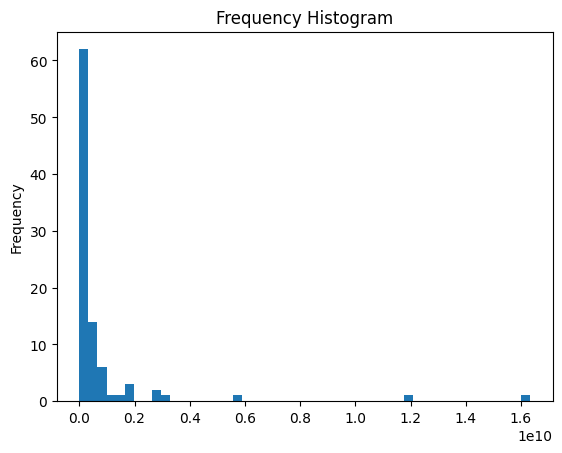

In [25]:
plt.hist(Y00, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

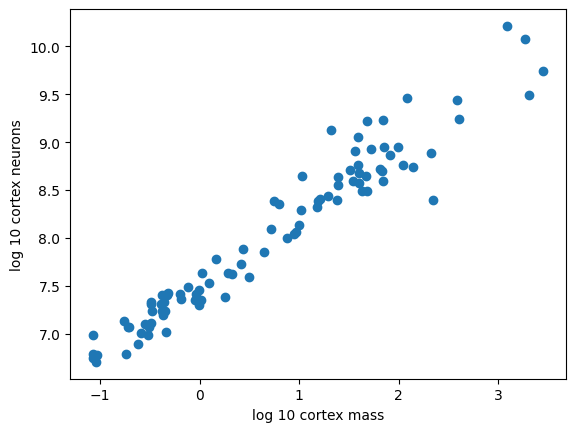

In [26]:
plt.scatter(np.log10(X00), np.log10(Y00))
plt.xlabel('log 10 cortex mass')
plt.ylabel('log 10 cortex neurons')
plt.show()

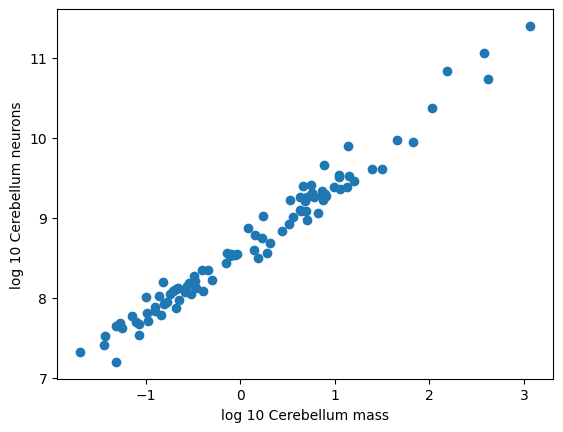

In [27]:
plt.scatter(np.log10(X01), np.log10(Y01))
plt.xlabel('log 10 Cerebellum mass')
plt.ylabel('log 10 Cerebellum neurons')
plt.show()

<Axes: xlabel='Forebrain m', ylabel='Forebrain n'>

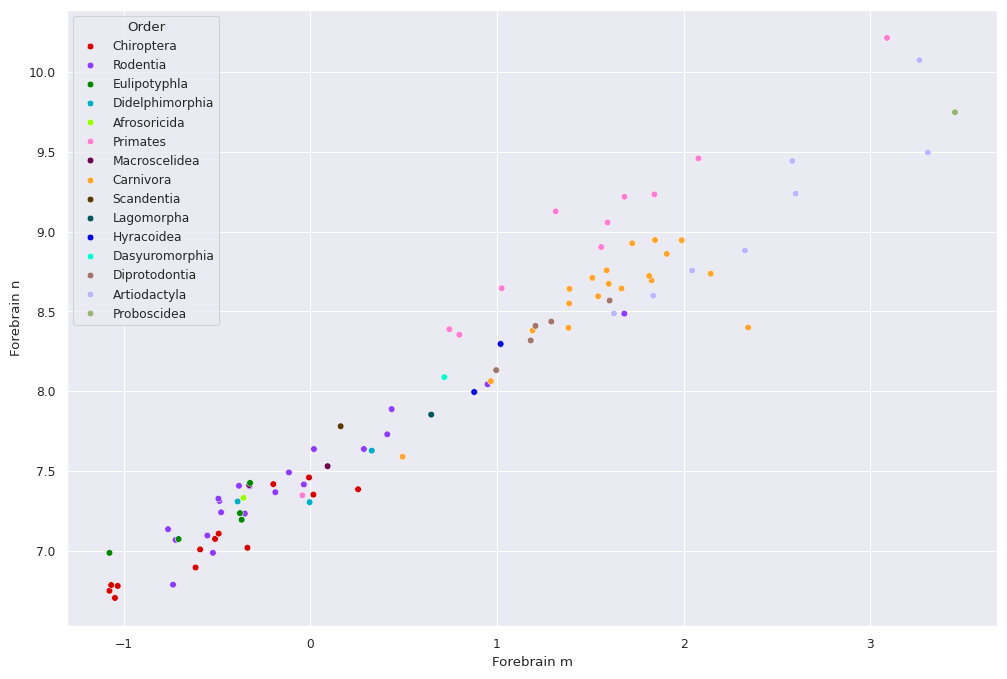

In [28]:
sns.set("paper", rc={"figure.figsize": (12, 8)})
palette = sns.color_palette(cc.glasbey, n_colors=15)
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(Y00), hue='Order', palette=palette)

<Axes: xlabel='Forebrain m', ylabel='Forebrain n d'>

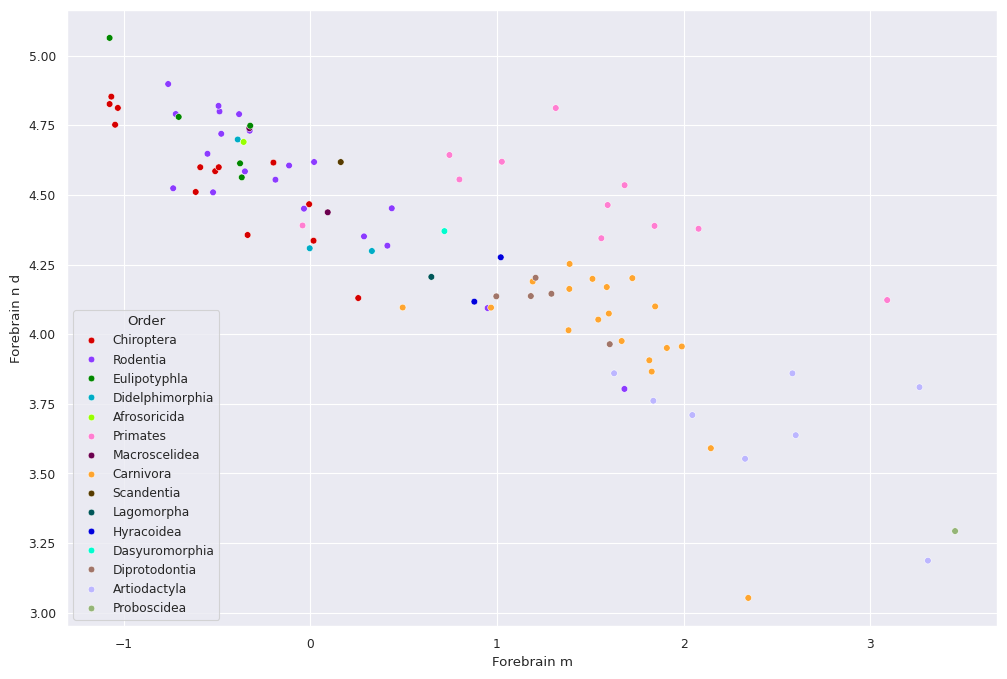

In [29]:
sns.scatterplot(data=Breng, x=np.log10(X00), y=np.log10(x05), hue='Order', palette=palette)

In [31]:
# Saving modified data
Breng.to_csv('/content/mammals with feature engineering 17 09 2024.csv')

In [32]:
# Cetacean brain weights and some statistics
m = np.array([2843, 2700, 4900, 3750, 6716, 7085, 5284, 748, 763, 644, 2083, 765, 4305, 2750, 3000, 2700, 1030, 4166, 2893, 2387,
              2720, 2994, 632, 1012, 622, 1103, 1200, 1126, 1148, 886, 510, 1162, 6411, 1440, 1860, 1463, 2149, 2355, 2997, 422,
              468, 6500, 1392, 540, 597, 866, 8028, 295, 221, 4249, 688, 1247, 748, 666, 819, 660, 1542, 1824, 2004])
np.mean(m)

2187.762711864407

In [33]:
np.std(m)

1894.8486486581082

In [34]:
np.median(m)

1440.0

<Axes: xlabel='Order', ylabel='Count'>

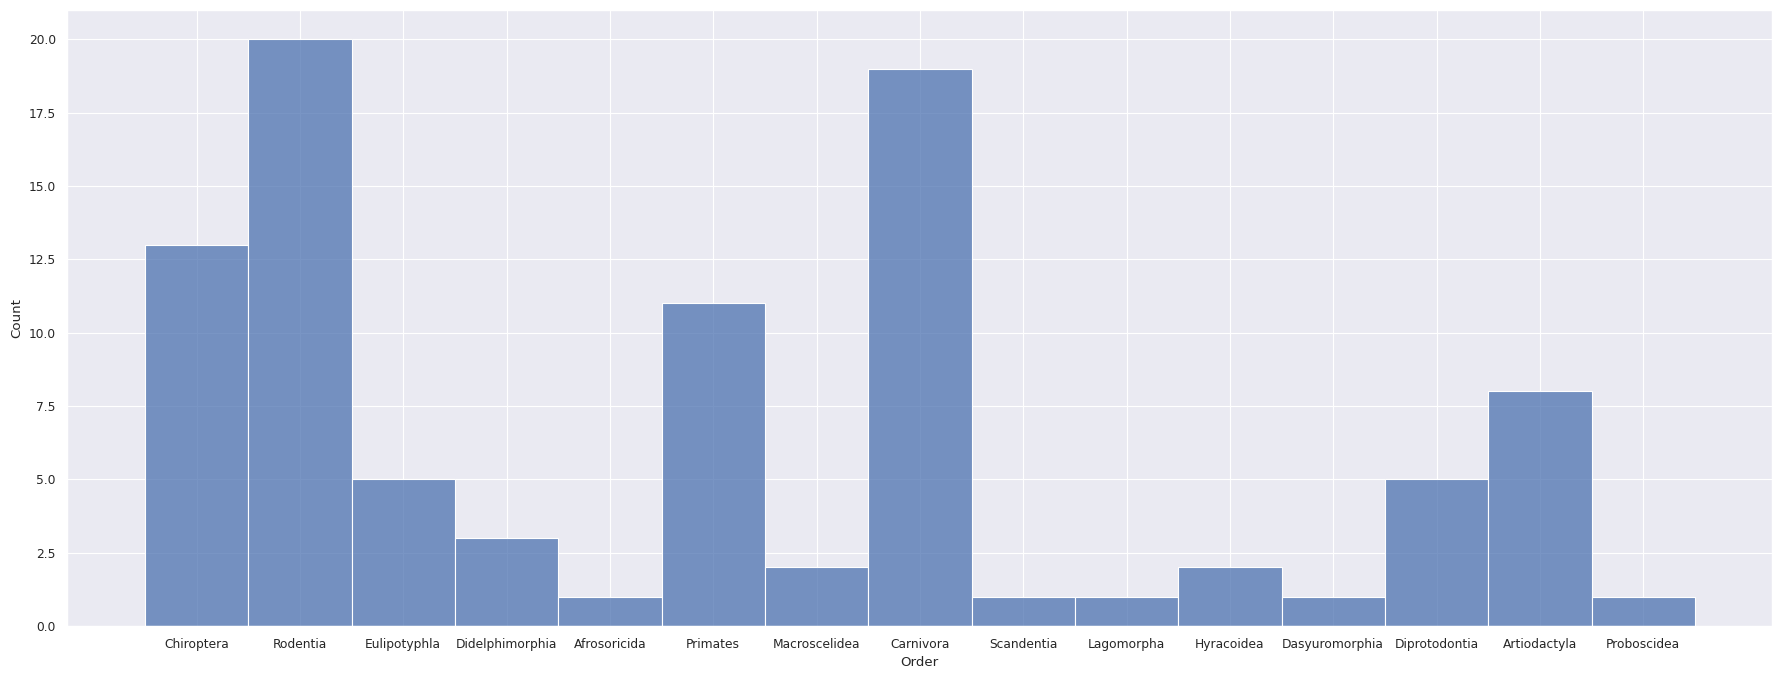

In [35]:
sns.set("paper", rc={"figure.figsize": (22, 8)})
sns.histplot(data=Breng, x="Order")

In [36]:
matrix = Breng.corr(numeric_only=True)

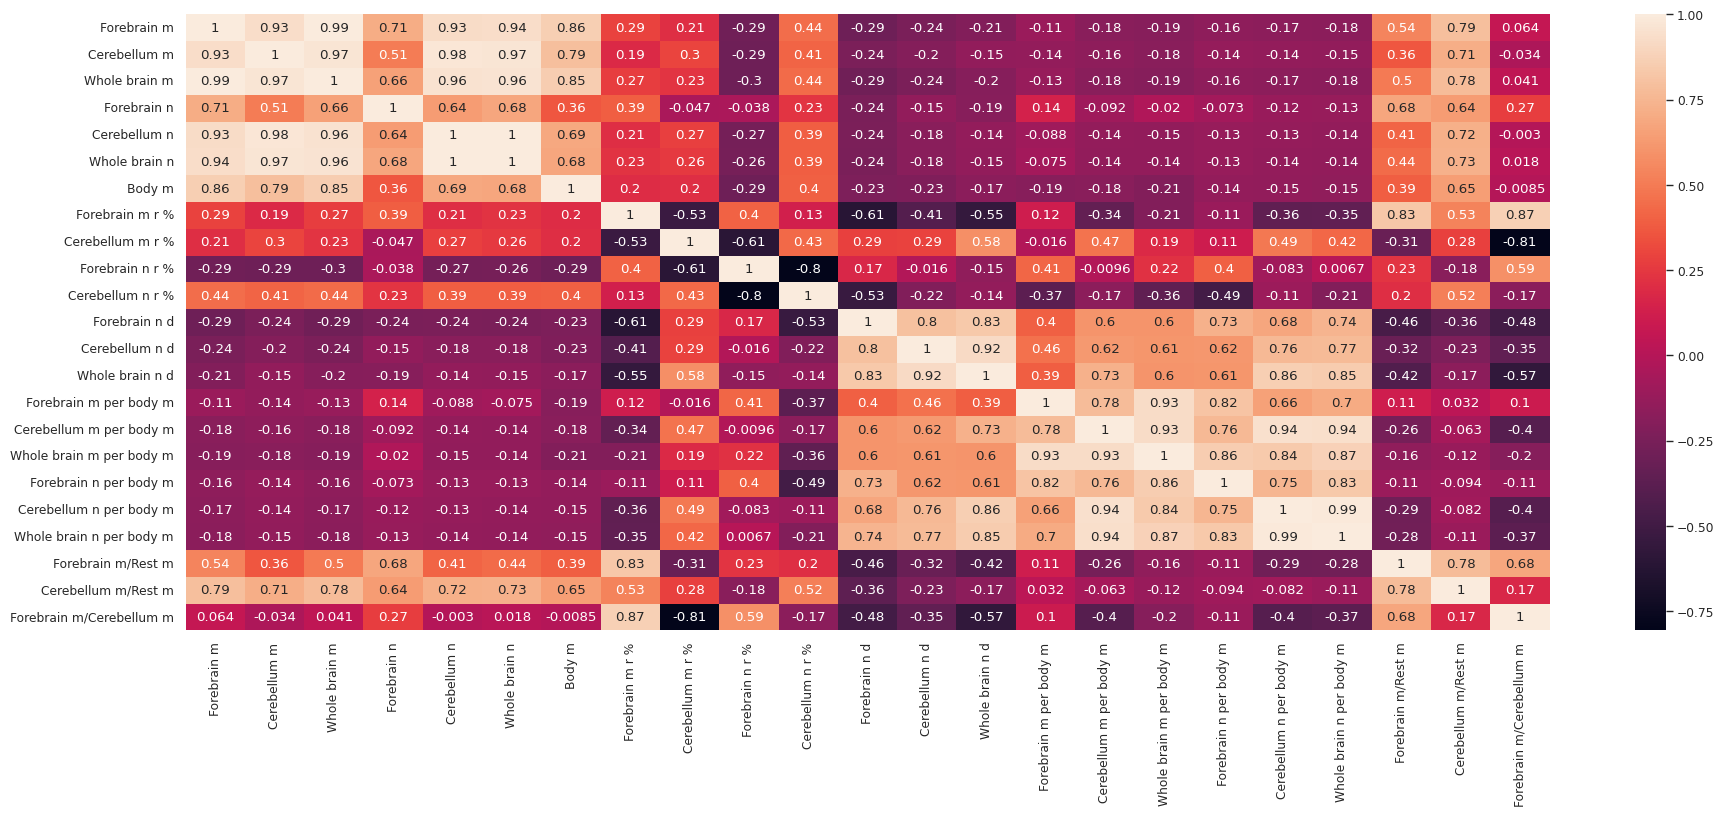

In [37]:
sns.heatmap(matrix, annot=True);

In [38]:
X = Breng[["Forebrain m", "Cerebellum m", "Whole brain m", "Body m", "Forebrain m r %", "Cerebellum m r %", "Forebrain m per body m",
          "Cerebellum m per body m", "Whole brain m per body m", "Forebrain m/Rest m", "Cerebellum m/Rest m", "Forebrain m/Cerebellum m"]]
Y1 = Breng["Forebrain n"]
Y2 = Breng["Cerebellum n"]
Y3 = Breng["Whole brain n"]

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [40]:
x_train, x_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, Y1, Y2, test_size=0.25, random_state=42)

In [41]:
regr_neocortex = RandomForestRegressor(random_state=42)


In [42]:
regr_neocortex.fit(x_train, y1_train)

RandomForestRegressor(random_state=42)

In [43]:
mean_squared_error(y1_test, regr_neocortex.predict(x_test))

6.884993050206386e+17

In [44]:
r2_score(y1_test, regr_neocortex.predict(x_test))

0.450457674675104

In [45]:
cols = ["Forebrain m", "Cerebellum m", "Whole brain m", "Body m", "Forebrain m r %", "Cerebellum m r %", "Forebrain m per body m",
          "Cerebellum m per body m", "Whole brain m per body m", "Forebrain m/Rest m", "Cerebellum m/Rest m", "Forebrain m/Cerebellum m"]

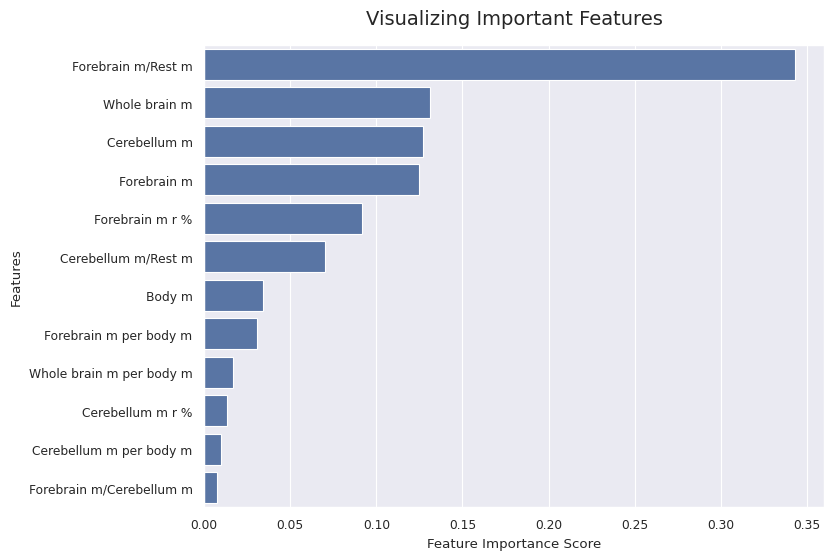

In [46]:
fig01 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regr_neocortex.feature_importances_, index=cols).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [47]:
regr_cerebellum = RandomForestRegressor(random_state=42)

In [48]:
regr_cerebellum.fit(x_train, y2_train)

RandomForestRegressor(random_state=42)

In [49]:
mean_squared_error(y2_test, regr_cerebellum.predict(x_test))

1.3613407950461005e+21

In [50]:
r2_score(y2_test, regr_cerebellum.predict(x_test))

0.45463755734728206

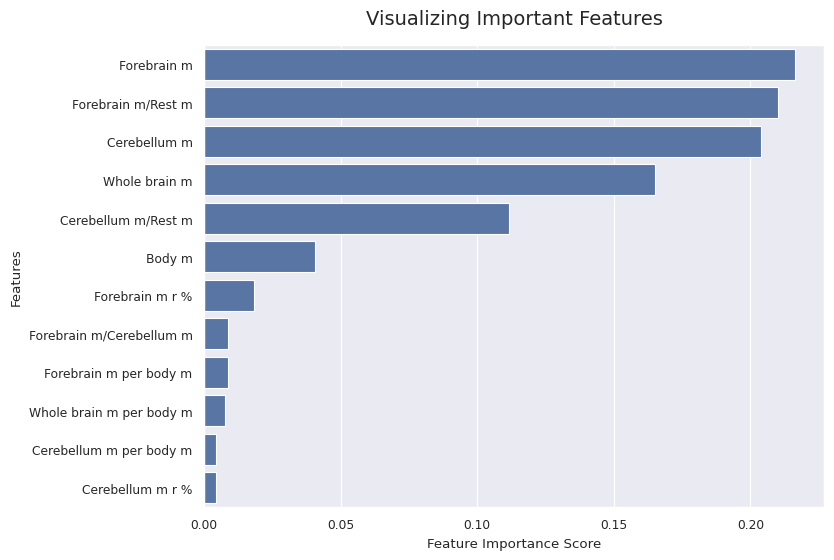

In [51]:
fig01 = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(regr_cerebellum.feature_importances_, index=cols).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [52]:
for i in range(x_train.shape[1]):
    train_feature = x_train.iloc[:,i]
    test_feature = x_test.iloc[:,i]
    regr_neocortex_one = RandomForestRegressor(random_state=42)
    regr_neocortex_one.fit(train_feature.values.reshape(-1,1), y1_train)
    print(x_train.columns[i], 'MSE = ', mean_squared_error(y1_test, regr_neocortex_one.predict(test_feature.values.reshape(-1,1))))
    print(x_train.columns[i], 'r2 = ', r2_score(y1_test, regr_neocortex_one.predict(test_feature.values.reshape(-1,1))))

Forebrain m MSE =  1.5326365926845565e+17
Forebrain m r2 =  0.8776689139872627
Cerebellum m MSE =  1.2628294633446502e+17
Cerebellum m r2 =  0.8992042207283845
Whole brain m MSE =  1.50269847089639e+17
Whole brain m r2 =  0.8800584973816621
Body m MSE =  6.758587152676996e+17
Body m r2 =  0.4605470662484187
Forebrain m r % MSE =  1.5994258734276416e+18
Forebrain m r % r2 =  -0.27662033535659303
Cerebellum m r % MSE =  2.0380779522351788e+18
Cerebellum m r % r2 =  -0.6267410713379713
Forebrain m per body m MSE =  1.574640017853109e+18
Forebrain m per body m r2 =  -0.25683690695184325
Cerebellum m per body m MSE =  1.306050862397525e+19
Cerebellum m per body m r2 =  -9.424559947711302
Whole brain m per body m MSE =  6.996457405865748e+17
Whole brain m per body m r2 =  0.44156087830171464
Forebrain m/Rest m MSE =  2.0535816729229087e+18
Forebrain m/Rest m r2 =  -0.6391157399190346
Cerebellum m/Rest m MSE =  5.673239053272925e+18
Cerebellum m/Rest m r2 =  -3.5282325758718933
Forebrain m/Ce

In [53]:
for i in range(x_train.shape[1]):
    train_feature = x_train.iloc[:,i]
    test_feature = x_test.iloc[:,i]
    regr_cerebellum_one = RandomForestRegressor(random_state=42)
    regr_cerebellum_one.fit(train_feature.values.reshape(-1,1), y2_train)
    print(x_train.columns[i], 'MSE = ', mean_squared_error(y2_test, regr_cerebellum_one.predict(test_feature.values.reshape(-1,1))))
    print(x_train.columns[i], 'r2 = ', r2_score(y2_test, regr_cerebellum_one.predict(test_feature.values.reshape(-1,1))))

Forebrain m MSE =  1.311329231190008e+21
Forebrain m r2 =  0.474672532222561
Cerebellum m MSE =  1.3046289499686623e+21
Cerebellum m r2 =  0.47735671075201547
Whole brain m MSE =  1.3047853515632623e+21
Whole brain m r2 =  0.4772940552024454
Body m MSE =  1.0725620170366393e+21
Body m r2 =  0.5703243128860914
Forebrain m r % MSE =  2.6347606059714184e+21
Forebrain m r % r2 =  -0.05550313713258648
Cerebellum m r % MSE =  2.6618899911858156e+21
Cerebellum m r % r2 =  -0.06637135458557841
Forebrain m per body m MSE =  2.3415315431149097e+21
Forebrain m per body m r2 =  0.06196643298396742
Cerebellum m per body m MSE =  2.9523292352609596e+21
Cerebellum m per body m r2 =  -0.18272330419836114
Whole brain m per body m MSE =  1.2369915549830178e+21
Whole brain m per body m r2 =  0.5044527142496471
Forebrain m/Rest m MSE =  2.68695586586999e+21
Forebrain m/Rest m r2 =  -0.07641291559273644
Cerebellum m/Rest m MSE =  1.4743191028809568e+21
Cerebellum m/Rest m r2 =  0.4093776737444391
Forebrain

In [54]:
for i in range(3, len(Breng.columns)):
  ratio = max(Breng.iloc[:,i])/min(Breng.iloc[:,i])
  print(Breng.columns[i], 'ratio = ', ratio)

Forebrain m ratio =  33892.85714285714
Cerebellum m ratio =  58550.0
Whole brain m ratio =  26238.636363636364
Forebrain n ratio =  3216.535433070866
Cerebellum n ratio =  15927.573062261754
Whole brain n ratio =  9562.5
Body m ratio =  1388888.8888888888
Forebrain m r % ratio =  3.6548932011726927
Cerebellum m r % ratio =  3.311539991355277
Forebrain n r % ratio =  20.255545797093234
Cerebellum n r % ratio =  1.8403190195638037
Forebrain n d ratio =  102.4624457106427
Cerebellum n d ratio =  8.203428005937655
Whole brain n d ratio =  17.36687879311506
Forebrain m per body m ratio =  82.20258997863975
Cerebellum m per body m ratio =  120.21600411619596
Whole brain m per body m ratio =  106.36948668540406
Forebrain n per body m ratio =  3466.772452094724
Cerebellum n per body m ratio =  648.7424786450904
Whole brain n per body m ratio =  844.8075197970799
Forebrain m/Rest m ratio =  28.439519852262233
Cerebellum m/Rest m ratio =  9.481244855967077
Forebrain m/Cerebellum m ratio =  7.026